<table style="border: none" align="center">
   <tr style="border: none">
      <th style="border: none"><font face="verdana" size="4" color="black"><b>  Face recognition attacks  </b></font></font></th>
   </tr> 
</table>

<a id="prereqs"></a>
## 1. Loading prereqs

In [ ]:
!pip install -q tensorflow==2.0.0
!pip install adversarial-robustness-toolbox[all]
!pip install h5py==2.10.0
!pip install git+https://github.com/JanderHungrige/tf.keras-vggface
!pip install Pillow

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.compat.v1.disable_eager_execution()

import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from art import config
from art.estimators.classification import KerasClassifier

import PIL
import art

if tf.__version__[0] != '2':
    raise ImportError('This notebook requires TensorFlow v2.')

print("\nTensorflow Version: " + tf.__version__)
print("ART Version: " + art.__version__)
print("GPU Available: ", tf.test.is_gpu_available())

<a id="classifier"></a>
## 2. Evaluating the classifier

Load the pre-trained classifier (a ResNet architecture):

In [ ]:
from keras_vggface_TF.vggfaceTF import VGGFace
classifier_model = VGGFace(model='resnet50', include_top=True, input_shape=(224, 224, 3), pooling='avg')
classifier = KerasClassifier(clip_values=(0, 255), model=classifier_model, use_logits=False)

I Am  none
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
classifier_model.summary()

Evaluate the classifier on the original two images:

In [ ]:
from keras_vggface_TF import utils
from io import BytesIO
from PIL import Image
import requests

# Brad Pitt
response = requests.get("http://www.voxy.co.nz/files/imagecache/news_item_image/files/brad-pitt-square_1.jpg")
img_bytes = BytesIO(response.content)
brad_img = Image.open(img_bytes).resize((224,224))
brad = tf.keras.preprocessing.image.img_to_array(brad_img)
# Bob Marley
response = requests.get("https://pbs.twimg.com/media/D_dApiWUwAAmDC1.jpg")
img_bytes = BytesIO(response.content)
bob_img = Image.open(img_bytes).resize((224,224))
bob = tf.keras.preprocessing.image.img_to_array(bob_img)

brad = utils.preprocess_input(brad, version=1).reshape(1,224,224,3)
brad_pred = np.argmax(classifier.predict(brad), axis=1)
bob = utils.preprocess_input(bob, version=1).reshape(1,224,224,3)
bob_pred = np.argmax(classifier.predict(bob), axis=1)

fpath = tf.keras.utils.get_file('rcmalli_vggface_labels_v2.npy',
                             "https://github.com/rcmalli/keras-vggface/releases/download/v2.0/rcmalli_vggface_labels_v2.npy",
                             cache_subdir="./")
LABELS = np.load(fpath)

print("Original test data:")
print("Brad classified: {}".format(LABELS[brad_pred[0]]))
print("Bob classified: {}".format(LABELS[bob_pred[0]]))

Original test data:
Brad classified:  Brad_Pitt
Bob classified:  Bob_Marley


For illustration purposes, look at the 2 images

<Figure size 432x288 with 0 Axes>

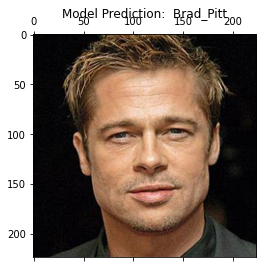

<Figure size 432x288 with 0 Axes>

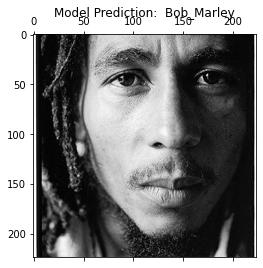

In [ ]:
plt.figure()
plt.matshow(brad_img)
plt.title("Model Prediction: {}".format(LABELS[brad_pred[0]]))
plt.show()

plt.figure()
plt.matshow(bob_img)
plt.title("Model Prediction: {}".format(LABELS[bob_pred[0]]))
plt.show()

Generate error-generic adversarial samples:

In [ ]:
# TO DO

Evaluate the classifier on the 2 error-generic adversarial samples:

In [ ]:
# TO DO

Now plot the adversarial images and their predicted labels.

In [ ]:
# TO DO

Generate error-specific adversarial samples:

In [ ]:
# TO DO

Evaluate the classifier on the 2 error-specific adversarial samples:

In [ ]:
# TO DO